In [19]:
from pandas import DataFrame, concat
from pandas import read_csv
from keras.models import Sequential
from keras.layers import GRU
from keras.layers import Dense
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler

In [20]:
dataset = read_csv('with_timestamp.csv', header=0, index_col=0)
dataset.drop(["@timestamp", "anomaly"], axis=1, inplace=True)
dataset.head()

,system.cpu.idle.pct,system.cpu.iowait.pct,system.cpu.softirq.pct,system.cpu.system.pct,system.cpu.total.pct,system.cpu.user.pct,system.diskio_sda.iostat.await,system.diskio_sda.iostat.busy,system.diskio_sda.iostat.queue.avg_size,system.diskio_sda.iostat.read.request.merges_per_sec,...,jolokia.metrics.threading.thread_count,system.load.1,system.load.15,system.load.5,system.load.norm.1,system.load.norm.15,system.load.norm.5,system.memory.actual.used.pct,system.memory.swap.used.pct,system.memory.used.pct
0,3.5818,0.0474,0.0312,0.1058,0.4182,0.2338,0.698,12.601,0.165,0.0,...,995,0.68,0.97,1.00,0.170,0.243,0.250,0.6904,0.0,0.9620
1,3.5080,0.0934,0.0271,0.1054,0.4920,0.2661,0.572,11.104,0.137,0.0,...,995,0.58,0.96,0.97,0.145,0.240,0.243,0.6903,0.0,0.9626
2,3.5337,0.1136,0.0291,0.1025,0.4663,0.2211,0.572,11.104,0.137,0.0,...,995,0.65,0.96,0.97,0.163,0.240,0.243,0.6904,0.0,0.9628
3,3.5742,0.0503,0.0201,0.0916,0.4258,0.2637,0.572,11.104,0.137,0.0,...,995,0.68,0.95,0.95,0.170,0.238,0.238,0.6903,0.0,0.9635
4,3.5454,0.0705,0.0268,0.1051,0.4546,0.2522,0.572,11.104,0.137,0.0,...,995,0.68,0.95,0.95,0.170,0.238,0.238,0.6905,0.0,0.9638


## Set Multiple Model Parameters

In [73]:
model_epoches = 200
model_batch_size = 200

## Normalizing Data

In [74]:
dataset[dataset.columns] = StandardScaler().fit_transform(dataset)

## Shifting the dataset
shifting only one minute

In [75]:
dataset_shifted = dataset.shift(-6)
dataset = dataset.iloc[:-6]
dataset_shifted = dataset_shifted.iloc[:-6]

## Spliting the dataset 
Ratio - 80 : 20

In [76]:
train = dataset.shape[0] * 2 // 10
    
train_dataset = dataset.iloc[:-train]
train_dataset_shifted = dataset_shifted.iloc[:-train]

test_dataset = dataset.iloc[-train:]
test_dataset_shifted = dataset_shifted.iloc[-train:]

In [77]:
train_dataset = train_dataset.values.reshape((train_dataset.shape[0], 1, train_dataset.shape[1]))
test_dataset_shaped = test_dataset.values.reshape((test_dataset.shape[0], 1, test_dataset.shape[1]))
print(train_dataset_shifted.shape)

(39986, 39)


## Training Models

### Feature Set 1
- system.cpu.iowait.pct'
- system.diskio_sda.iostat.await'
- system.diskio_sda.iostat.busy'
- system.diskio_sda.iostat.queue.avg_size'
- system.diskio_sda.iostat.read.request.merges_per_sec'
- system.diskio_sda.iostat.read.request.per_sec'
- system.diskio_sda.iostat.request.avg_size'
- system.diskio_sda.iostat.service_time'
- system.diskio_sda.iostat.write.request.merges_per_sec'
- system.diskio_sda.iostat.write.request.per_sec'
- system.diskio_sda2.iostat.await'
- system.diskio_sda2.iostat.busy'
- system.diskio_sda2.iostat.queue.avg_size'
- system.diskio_sda2.iostat.read.request.merges_per_sec'
- system.diskio_sda2.iostat.read.request.per_sec'
- system.diskio_sda2.iostat.request.avg_size'
- system.diskio_sda2.iostat.service_time'
- system.diskio_sda2.iostat.write.request.merges_per_sec'
- system.diskio_sda2.iostat.write.request.per_sec'

In [78]:
train_dataset_shifted_1 = train_dataset_shifted[[
    'system.cpu.iowait.pct',
    'system.diskio_sda.iostat.await',
    'system.diskio_sda.iostat.busy',
    'system.diskio_sda.iostat.queue.avg_size',
    'system.diskio_sda.iostat.read.request.merges_per_sec',
    'system.diskio_sda.iostat.read.request.per_sec',
    'system.diskio_sda.iostat.request.avg_size',
    'system.diskio_sda.iostat.service_time',
    'system.diskio_sda.iostat.write.request.merges_per_sec',
    'system.diskio_sda.iostat.write.request.per_sec',
    'system.diskio_sda2.iostat.await',
    'system.diskio_sda2.iostat.busy',
    'system.diskio_sda2.iostat.queue.avg_size',
    'system.diskio_sda2.iostat.read.request.merges_per_sec',
    'system.diskio_sda2.iostat.read.request.per_sec',
    'system.diskio_sda2.iostat.request.avg_size',
    'system.diskio_sda2.iostat.service_time',
    'system.diskio_sda2.iostat.write.request.merges_per_sec',
    'system.diskio_sda2.iostat.write.request.per_sec']]
train_dataset_shifted_1.head()

test_dataset_shifted_1 = test_dataset_shifted[[
    'system.cpu.iowait.pct',
    'system.diskio_sda.iostat.await',
    'system.diskio_sda.iostat.busy',
    'system.diskio_sda.iostat.queue.avg_size',
    'system.diskio_sda.iostat.read.request.merges_per_sec',
    'system.diskio_sda.iostat.read.request.per_sec',
    'system.diskio_sda.iostat.request.avg_size',
    'system.diskio_sda.iostat.service_time',
    'system.diskio_sda.iostat.write.request.merges_per_sec',
    'system.diskio_sda.iostat.write.request.per_sec',
    'system.diskio_sda2.iostat.await',
    'system.diskio_sda2.iostat.busy',
    'system.diskio_sda2.iostat.queue.avg_size',
    'system.diskio_sda2.iostat.read.request.merges_per_sec',
    'system.diskio_sda2.iostat.read.request.per_sec',
    'system.diskio_sda2.iostat.request.avg_size',
    'system.diskio_sda2.iostat.service_time',
    'system.diskio_sda2.iostat.write.request.merges_per_sec',
    'system.diskio_sda2.iostat.write.request.per_sec']]

In [80]:
model_lstm_1 = Sequential()
model_lstm_1.add(GRU(10, input_shape=(1, train_dataset_shifted.shape[1])))
model_lstm_1.add(Dense(19))
model_lstm_1.compile(loss='mse', optimizer='adam')

# history = model_lstm_1.fit(train_dataset, train_dataset_shifted_1, verbose=2, shuffle=False, epochs=model_epoches, validation_data=(test_dataset_shaped ,test_dataset_shifted_1), batch_size= 200)
history = model_lstm_1.fit(train_dataset, train_dataset_shifted_1, verbose=2, shuffle=False, epochs=model_epoches)

Epoch 1/200
 - 8s - loss: 0.7228
Epoch 2/200
 - 6s - loss: 0.6441
Epoch 3/200
 - 6s - loss: 0.5816
Epoch 4/200
 - 8s - loss: 0.5248
Epoch 5/200
 - 9s - loss: 0.4732
Epoch 6/200
 - 9s - loss: 0.4329
Epoch 7/200
 - 10s - loss: 0.3984
Epoch 8/200
 - 11s - loss: 0.3691
Epoch 9/200
 - 12s - loss: 0.3471
Epoch 10/200
 - 11s - loss: 0.3312
Epoch 11/200
 - 11s - loss: 0.3187
Epoch 12/200
 - 11s - loss: 0.3086
Epoch 13/200
 - 11s - loss: 0.3024
Epoch 14/200
 - 7s - loss: 0.2961
Epoch 15/200
 - 7s - loss: 0.2920
Epoch 16/200
 - 7s - loss: 0.2897
Epoch 17/200
 - 7s - loss: 0.2856
Epoch 18/200
 - 6s - loss: 0.2811
Epoch 19/200
 - 7s - loss: 0.2789
Epoch 20/200
 - 7s - loss: 0.2763
Epoch 21/200
 - 6s - loss: 0.2721
Epoch 22/200
 - 6s - loss: 0.2678
Epoch 23/200
 - 6s - loss: 0.2692
Epoch 24/200
 - 6s - loss: 0.2666
Epoch 25/200
 - 6s - loss: 0.2619
Epoch 26/200
 - 7s - loss: 0.2575
Epoch 27/200
 - 7s - loss: 0.2553
Epoch 28/200
 - 7s - loss: 0.2529
Epoch 29/200
 - 7s - loss: 0.2562
Epoch 30/200
 - 

## Training Summary

In [27]:
# summarize history for loss
# pyplot.subplot(1,1,1)
# pyplot.plot(history.history['loss'], '.-')
# pyplot.plot(history.history['val_loss'], '.-')
# pyplot.ylabel('loss')
# pyplot.xlabel('epoch')
# pyplot.legend(['train', 'validation'], loc='upper right')
# pyplot.show()

### Feature Set 2
- system.cpu.total.pct'
- system.cpu.user.pct'

In [94]:
train_dataset_shifted_2 = train_dataset_shifted[[
    'system.cpu.total.pct',
    'system.cpu.user.pct']]

train_dataset_shifted_2.head()

,system.cpu.total.pct,system.cpu.user.pct
0,-0.282560,-0.241308
1,-0.235850,-0.235972
2,-0.259439,-0.255904
3,-0.148053,-0.187477
4,-0.247566,-0.233304


In [95]:
model_lstm_2 = Sequential()
model_lstm_2.add(GRU(10, input_shape=(1, train_dataset_shifted.shape[1]), activation='softplus', recurrent_activation='linear'))
model_lstm_2.add(Dense(2))
model_lstm_2.compile(loss='mse', optimizer='adam')

model_lstm_2.fit(train_dataset, train_dataset_shifted_2, verbose=2, shuffle=False, epochs=model_epoches)

Epoch 1/200
 - 8s - loss: 822.8668
Epoch 2/200
 - 5s - loss: 3.2564
Epoch 3/200
 - 7s - loss: 1.1371
Epoch 4/200
 - 5s - loss: 0.5063
Epoch 5/200
 - 5s - loss: 0.2805
Epoch 6/200
 - 5s - loss: 0.2221
Epoch 7/200
 - 5s - loss: 0.1932
Epoch 8/200
 - 5s - loss: 0.1339
Epoch 9/200
 - 5s - loss: 0.1620
Epoch 10/200
 - 5s - loss: 0.1097
Epoch 11/200
 - 5s - loss: 0.1397
Epoch 12/200
 - 5s - loss: 0.2638
Epoch 13/200
 - 5s - loss: 0.1410
Epoch 14/200
 - 5s - loss: 0.1260
Epoch 15/200
 - 5s - loss: 0.1318
Epoch 16/200
 - 5s - loss: 0.0899
Epoch 17/200
 - 5s - loss: 0.0605
Epoch 18/200
 - 5s - loss: 0.0606
Epoch 19/200
 - 5s - loss: 0.0663
Epoch 20/200
 - 5s - loss: 0.0646
Epoch 21/200
 - 5s - loss: 0.0590
Epoch 22/200
 - 5s - loss: 0.0349
Epoch 23/200
 - 5s - loss: 0.0315
Epoch 24/200
 - 5s - loss: 0.0438
Epoch 25/200
 - 6s - loss: 0.0529
Epoch 26/200
 - 5s - loss: 7.0266
Epoch 27/200
 - 5s - loss: 0.0570
Epoch 28/200
 - 5s - loss: 0.0372
Epoch 29/200
 - 5s - loss: 0.1039
Epoch 30/200
 - 5s - 

### Feature Set 3
- jolokia.metrics.memory.heap_memory_usage.committed'
- jolokia.metrics.memory.heap_memory_usage.max'

In [96]:
train_dataset_shifted_3 = train_dataset_shifted[[
    'jolokia.metrics.memory.heap_memory_usage.committed',
    'jolokia.metrics.memory.heap_memory_usage.max']]

train_dataset_shifted_3.head()

,jolokia.metrics.memory.heap_memory_usage.committed,jolokia.metrics.memory.heap_memory_usage.max
0,-0.359990,-0.359990
1,-0.005896,-0.005896
2,-0.005896,-0.005896
3,-0.005896,-0.005896
4,-0.005896,-0.005896


In [97]:
model_lstm_3 = Sequential()
model_lstm_3.add(GRU(10, input_shape=(1, train_dataset_shifted.shape[1]), activation='softplus', recurrent_activation='linear'))
model_lstm_3.add(Dense(2))
model_lstm_3.compile(loss='mse', optimizer='adam')

model_lstm_3.fit(train_dataset, train_dataset_shifted_3, verbose=2, shuffle=False, epochs=model_epoches)

Epoch 1/200
 - 9s - loss: 567.0141
Epoch 2/200
 - 6s - loss: 1.8464
Epoch 3/200
 - 6s - loss: 1.2109
Epoch 4/200
 - 6s - loss: 0.9302
Epoch 5/200
 - 6s - loss: 0.6734
Epoch 6/200
 - 6s - loss: 0.5419
Epoch 7/200
 - 6s - loss: 0.4743
Epoch 8/200
 - 6s - loss: 0.4411
Epoch 9/200
 - 6s - loss: 0.4233
Epoch 10/200
 - 6s - loss: 0.4154
Epoch 11/200
 - 6s - loss: 0.4074
Epoch 12/200
 - 6s - loss: 0.4049
Epoch 13/200
 - 7s - loss: 0.5237
Epoch 14/200
 - 6s - loss: 0.4036
Epoch 15/200
 - 7s - loss: 0.4075
Epoch 16/200
 - 6s - loss: 0.4304
Epoch 17/200
 - 5s - loss: 0.4061
Epoch 18/200
 - 5s - loss: 0.3975
Epoch 19/200
 - 5s - loss: 3.2504
Epoch 20/200
 - 5s - loss: 0.4114
Epoch 21/200
 - 5s - loss: 0.4069
Epoch 22/200
 - 6s - loss: 0.3939
Epoch 23/200
 - 5s - loss: 0.3949
Epoch 24/200
 - 6s - loss: 0.3966
Epoch 25/200
 - 6s - loss: 0.3815
Epoch 26/200
 - 6s - loss: 0.3847
Epoch 27/200
 - 7s - loss: 0.3746
Epoch 28/200
 - 8s - loss: 0.3777
Epoch 29/200
 - 6s - loss: 0.3790
Epoch 30/200
 - 5s - 

### Feature Set 4
- system.load.1'
- system.load.15'
- system.load.5'
- system.load.norm.1'
- system.load.norm.15'
- system.load.norm.5'

In [98]:
train_dataset_shifted_4 = train_dataset_shifted[[
    'system.load.1',
    'system.load.15',
    'system.load.5',
    'system.load.norm.1',
    'system.load.norm.15',
    'system.load.norm.5']]

train_dataset_shifted_4.head()

,system.load.1,system.load.15,system.load.5,system.load.norm.1,system.load.norm.15,system.load.norm.5
0,-0.154515,-0.134026,-0.134025,-0.156842,-0.136740,-0.136533
1,-0.150103,-0.134026,-0.134025,-0.152432,-0.136740,-0.136533
2,-0.142384,-0.133202,-0.132817,-0.144714,-0.136080,-0.135324
3,-0.085038,-0.127433,-0.119527,-0.087386,-0.130146,-0.122035
4,-0.085038,-0.127433,-0.119527,-0.087386,-0.130146,-0.122035


In [99]:
model_lstm_4 = Sequential()
model_lstm_4.add(GRU(10, input_shape=(1, train_dataset_shifted.shape[1]), activation='softplus', recurrent_activation='linear'))
model_lstm_4.add(Dense(6))
model_lstm_4.compile(loss='mse', optimizer='adam')

model_lstm_4.fit(train_dataset, train_dataset_shifted_4, verbose=2, shuffle=False, epochs=model_epoches)

Epoch 1/200
 - 6s - loss: 39.4793
Epoch 2/200
 - 4s - loss: 0.8996
Epoch 3/200
 - 4s - loss: 0.7455
Epoch 4/200
 - 4s - loss: 0.6097
Epoch 5/200
 - 4s - loss: 0.4004
Epoch 6/200
 - 4s - loss: 0.1673
Epoch 7/200
 - 4s - loss: 0.0896
Epoch 8/200
 - 4s - loss: 0.1869
Epoch 9/200
 - 4s - loss: 0.1872
Epoch 10/200
 - 4s - loss: 0.1156
Epoch 11/200
 - 4s - loss: 0.1721
Epoch 12/200
 - 4s - loss: 0.1781
Epoch 13/200
 - 4s - loss: 0.1365
Epoch 14/200
 - 4s - loss: 0.1307
Epoch 15/200
 - 4s - loss: 0.1356
Epoch 16/200
 - 4s - loss: 0.1304
Epoch 17/200
 - 4s - loss: 0.0898
Epoch 18/200
 - 4s - loss: 0.1302
Epoch 19/200
 - 4s - loss: 0.2834
Epoch 20/200
 - 4s - loss: 0.0818
Epoch 21/200
 - 4s - loss: 0.0965
Epoch 22/200
 - 4s - loss: 0.0878
Epoch 23/200
 - 4s - loss: 0.1287
Epoch 24/200
 - 4s - loss: 0.1319
Epoch 25/200
 - 4s - loss: 0.1164
Epoch 26/200
 - 4s - loss: 0.0992
Epoch 27/200
 - 4s - loss: 0.0856
Epoch 28/200
 - 4s - loss: 0.1070
Epoch 29/200
 - 4s - loss: 0.0665
Epoch 30/200
 - 4s - l

### Feature Set 5
- system.cpu.idle.pct'
- system.cpu.softirq.pct'
- system.cpu.system.pct'
- jolokia.metrics.memory.heap_memory_usage.used'
- jolokia.metrics.memory.non_heap_memory_usage.used'
- jolokia.metrics.threading.daemon_thread_count'
- jolokia.metrics.threading.thread_count'
- system.memory.actual.used.pct'
- system.memory.swap.used.pct'
- system.memory.used.pct'

In [100]:
train_dataset_shifted_5 = train_dataset_shifted[[
    'system.cpu.idle.pct',
    'system.cpu.softirq.pct',
    'system.cpu.system.pct',
    'jolokia.metrics.memory.heap_memory_usage.used',
    'jolokia.metrics.memory.non_heap_memory_usage.used',
    'jolokia.metrics.threading.daemon_thread_count',
    'jolokia.metrics.threading.thread_count',
    'system.memory.actual.used.pct',
    'system.memory.swap.used.pct',
    'system.memory.used.pct']]

train_dataset_shifted_5.head()

,system.cpu.idle.pct,system.cpu.softirq.pct,system.cpu.system.pct,jolokia.metrics.memory.heap_memory_usage.used,jolokia.metrics.memory.non_heap_memory_usage.used,jolokia.metrics.threading.daemon_thread_count,jolokia.metrics.threading.thread_count,system.memory.actual.used.pct,system.memory.swap.used.pct,system.memory.used.pct
0,0.282560,0.141944,-0.245769,1.184835,-1.669211,-0.793561,-1.115653,-1.04667,-0.078424,-0.263775
1,0.235850,0.414498,-0.151079,-0.705853,-1.669687,-0.960803,-1.122716,-1.04220,-0.078424,-0.212049
2,0.259439,0.885274,0.615049,-0.705853,-1.669687,-0.960803,-1.122716,-1.03773,-0.078424,-0.189881
3,0.148053,-0.155388,0.124382,-0.705853,-1.669687,-0.960803,-1.122716,-1.04220,-0.078424,-0.138154
4,0.247566,0.216277,0.098558,-0.705853,-1.669687,-0.960803,-1.122716,-1.03773,-0.078424,-0.115986


In [101]:
model_lstm_5 = Sequential()
model_lstm_5.add(GRU(10, input_shape=(1, train_dataset_shifted.shape[1]), activation='softplus', recurrent_activation='linear'))
model_lstm_5.add(Dense(10))
model_lstm_5.compile(loss='mse', optimizer='adam')

model_lstm_5.fit(train_dataset, train_dataset_shifted_5, verbose=2, shuffle=False, epochs=model_epoches)

Epoch 1/200
 - 6s - loss: 574.8781
Epoch 2/200
 - 4s - loss: 26.7922
Epoch 3/200
 - 4s - loss: 2.3906
Epoch 4/200
 - 4s - loss: 1.6495
Epoch 5/200
 - 4s - loss: 1.2580
Epoch 6/200
 - 4s - loss: 1.0018
Epoch 7/200
 - 4s - loss: 0.8092
Epoch 8/200
 - 4s - loss: 0.7593
Epoch 9/200
 - 4s - loss: 0.5800
Epoch 10/200
 - 4s - loss: 0.5323
Epoch 11/200
 - 4s - loss: 0.4705
Epoch 12/200
 - 4s - loss: 0.4152
Epoch 13/200
 - 4s - loss: 0.3977
Epoch 14/200
 - 4s - loss: 0.3556
Epoch 15/200
 - 4s - loss: 0.3584
Epoch 16/200
 - 4s - loss: 0.3327
Epoch 17/200
 - 4s - loss: 0.3324
Epoch 18/200
 - 4s - loss: 0.3263
Epoch 19/200
 - 4s - loss: 0.3290
Epoch 20/200
 - 4s - loss: 0.3169
Epoch 21/200
 - 4s - loss: 0.2939
Epoch 22/200
 - 4s - loss: 0.2953
Epoch 23/200
 - 4s - loss: 0.2948
Epoch 24/200
 - 4s - loss: 0.2763
Epoch 25/200
 - 4s - loss: 0.3101
Epoch 26/200
 - 4s - loss: 0.2758
Epoch 27/200
 - 4s - loss: 0.2896
Epoch 28/200
 - 4s - loss: 0.2708
Epoch 29/200
 - 4s - loss: 0.2804
Epoch 30/200
 - 4s -

## Predicting 

### set 1

In [102]:
test_dataset_predicted_1 = model_lstm_1.predict(test_dataset.values.reshape((test_dataset.shape[0], 1, test_dataset.shape[1])))

In [103]:
test_dataset_predicted_pd_1 = DataFrame(test_dataset_predicted_1)
test_dataset_predicted_pd_1.columns = train_dataset_shifted_1.columns

### set 2

In [104]:
test_dataset_predicted_2 = model_lstm_2.predict(test_dataset.values.reshape((test_dataset.shape[0], 1, test_dataset.shape[1])))

In [105]:
test_dataset_predicted_pd_2 = DataFrame(test_dataset_predicted_2)
test_dataset_predicted_pd_2.columns = train_dataset_shifted_2.columns

### set 3

In [106]:
test_dataset_predicted_3 = model_lstm_3.predict(test_dataset.values.reshape((test_dataset.shape[0], 1, test_dataset.shape[1])))

In [107]:
test_dataset_predicted_pd_3 = DataFrame(test_dataset_predicted_3)
test_dataset_predicted_pd_3.columns = train_dataset_shifted_3.columns

### set 4

In [108]:
test_dataset_predicted_4 = model_lstm_4.predict(test_dataset.values.reshape((test_dataset.shape[0], 1, test_dataset.shape[1])))

In [109]:
test_dataset_predicted_pd_4 = DataFrame(test_dataset_predicted_4)
test_dataset_predicted_pd_4.columns = train_dataset_shifted_4.columns

### set 5

In [110]:
test_dataset_predicted_5 = model_lstm_5.predict(test_dataset.values.reshape((test_dataset.shape[0], 1, test_dataset.shape[1])))

In [111]:
test_dataset_predicted_pd_5 = DataFrame(test_dataset_predicted_5)
test_dataset_predicted_pd_5.columns = train_dataset_shifted_5.columns

### Merging Predictions

In [112]:
test_dataset_predicted_pd = concat([
    test_dataset_predicted_pd_1, 
    test_dataset_predicted_pd_2, 
    test_dataset_predicted_pd_3,
    test_dataset_predicted_pd_4,
    test_dataset_predicted_pd_5], axis=1)

test_dataset_predicted_pd = test_dataset_predicted_pd.set_index(test_dataset_shifted.index)
test_dataset_predicted_pd.head()

,system.cpu.iowait.pct,system.diskio_sda.iostat.await,system.diskio_sda.iostat.busy,system.diskio_sda.iostat.queue.avg_size,system.diskio_sda.iostat.read.request.merges_per_sec,system.diskio_sda.iostat.read.request.per_sec,system.diskio_sda.iostat.request.avg_size,system.diskio_sda.iostat.service_time,system.diskio_sda.iostat.write.request.merges_per_sec,system.diskio_sda.iostat.write.request.per_sec,...,system.cpu.idle.pct,system.cpu.softirq.pct,system.cpu.system.pct,jolokia.metrics.memory.heap_memory_usage.used,jolokia.metrics.memory.non_heap_memory_usage.used,jolokia.metrics.threading.daemon_thread_count,jolokia.metrics.threading.thread_count,system.memory.actual.used.pct,system.memory.swap.used.pct,system.memory.used.pct
39986,-0.129521,-0.124088,-0.139349,-0.094025,-0.098591,-0.097508,-0.026949,-0.137043,-0.142326,0.122948,...,0.239355,0.229655,0.482347,0.232920,0.920182,0.304569,-0.285952,-0.035325,-0.078142,0.153975
39987,-0.119361,-0.120806,-0.125765,-0.097448,-0.032361,-0.044487,-0.057106,-0.123892,-0.140651,0.108863,...,0.191507,0.205703,0.335555,0.529040,0.862624,0.255073,-0.357467,-0.024784,-0.079001,0.161272
39988,-0.120277,-0.128357,-0.137546,-0.106968,-0.079000,-0.089035,-0.075696,-0.129250,-0.148795,0.083911,...,0.194977,0.164487,0.198523,0.400105,0.831088,0.241318,-0.333679,-0.127498,-0.082761,0.188599
39989,-0.107309,-0.108240,-0.121196,-0.085626,-0.063586,-0.070280,-0.041716,-0.114996,-0.135707,0.058408,...,0.212757,0.129180,0.107904,0.601986,0.865525,0.240053,-0.332390,-0.119088,-0.105846,0.198353
39990,-0.130769,-0.129284,-0.147650,-0.101894,-0.132918,-0.134438,-0.046068,-0.140100,-0.148315,0.116327,...,0.197227,0.217979,0.435345,0.466548,0.869629,0.226913,-0.398593,-0.130202,-0.054079,0.164984


## Evaluating Prediction

In [113]:
print("Mean Squared Error : ", mean_squared_error(test_dataset_shifted, test_dataset_predicted_pd))

Mean Squared Error :  160747.38453638947


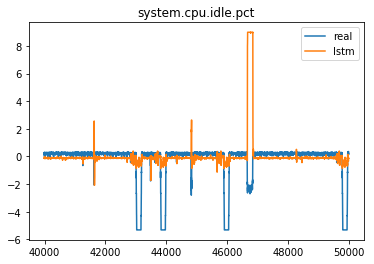

Mean Squared Error :  3.8442867622555466


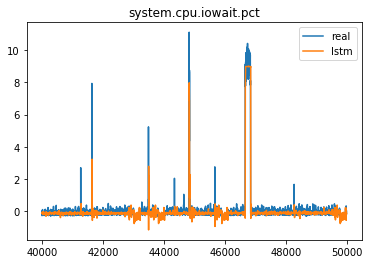

Mean Squared Error :  0.16422903397617658


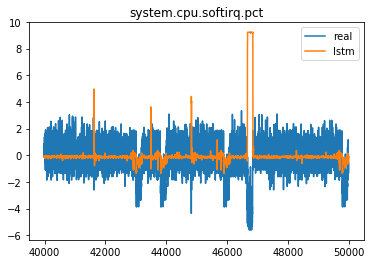

Mean Squared Error :  4.102138823761665


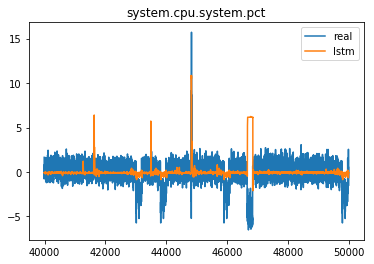

Mean Squared Error :  3.1721214438161924


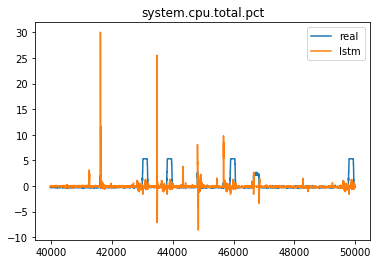

Mean Squared Error :  2.600649618954995


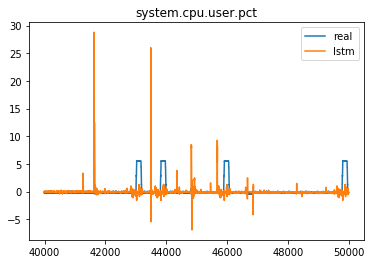

Mean Squared Error :  2.6557104607406052


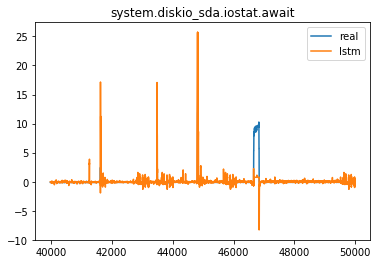

Mean Squared Error :  1.6598415460274056


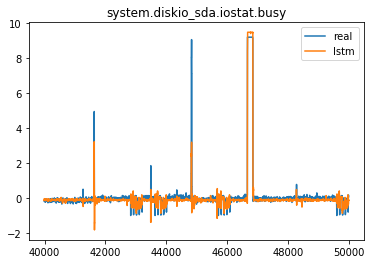

Mean Squared Error :  0.12155308082347907


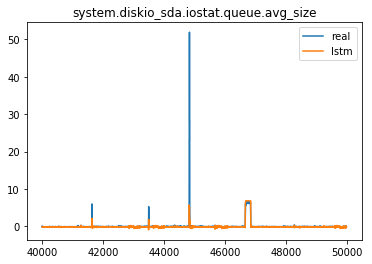

Mean Squared Error :  2.0069518122393157


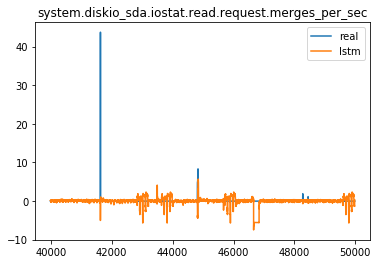

Mean Squared Error :  2.4166087136377845


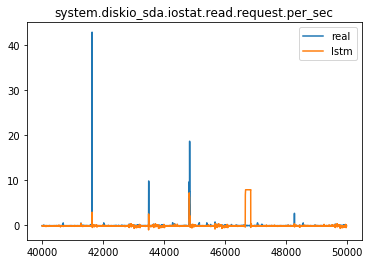

Mean Squared Error :  2.5113370992365076


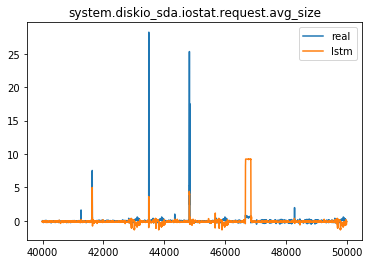

Mean Squared Error :  2.3947036406125646


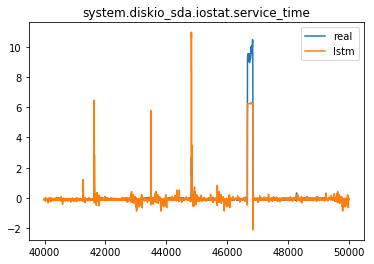

Mean Squared Error :  0.31011923627918647


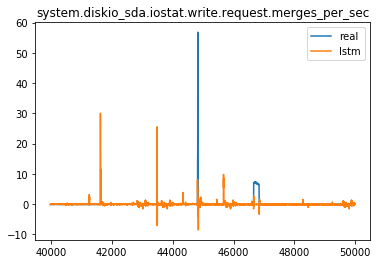

Mean Squared Error :  3.6098558781379113


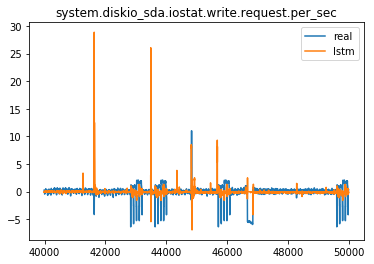

Mean Squared Error :  2.1185060931430257


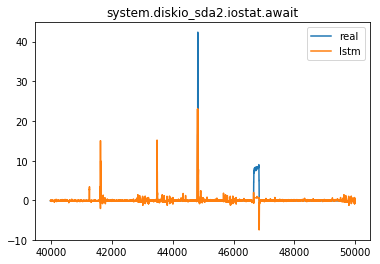

Mean Squared Error :  1.6735159355292297


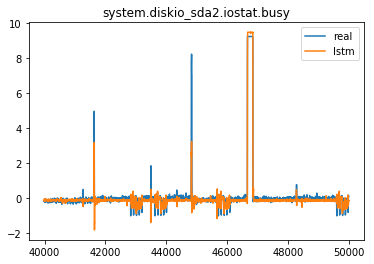

Mean Squared Error :  0.1112220523708858


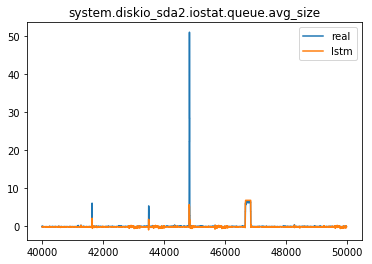

Mean Squared Error :  1.9507209359892634


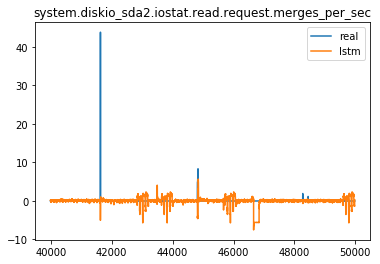

Mean Squared Error :  2.43381763015252


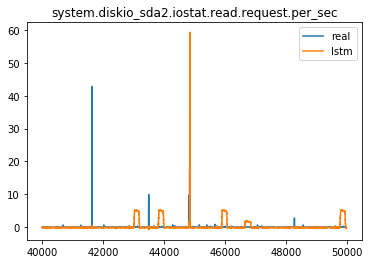

Mean Squared Error :  3.9366400897584755


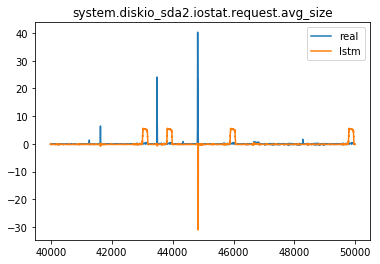

Mean Squared Error :  4.1799695782636235


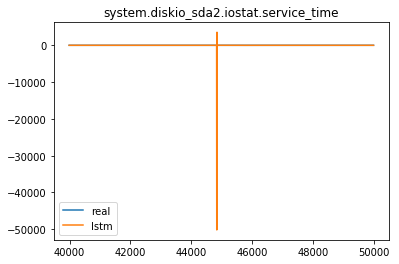

Mean Squared Error :  1386406.127762343


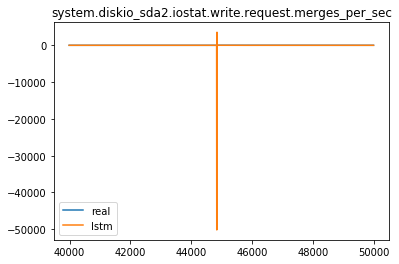

Mean Squared Error :  1387174.8216030065


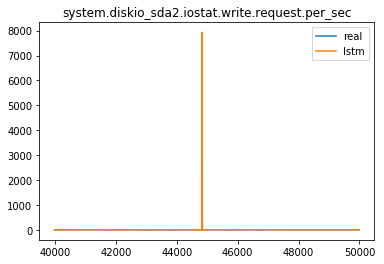

Mean Squared Error :  33918.8588236152


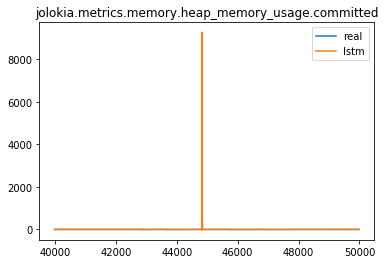

Mean Squared Error :  46232.465537496326


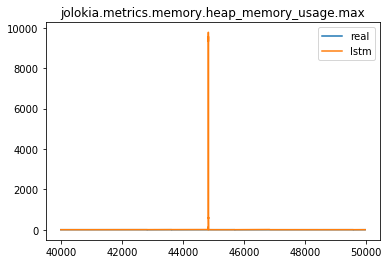

Mean Squared Error :  51396.497233948


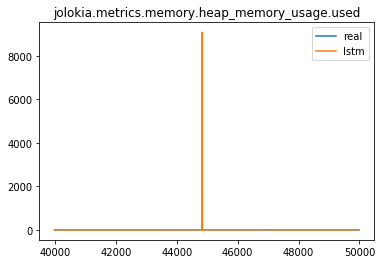

Mean Squared Error :  44240.178010553056


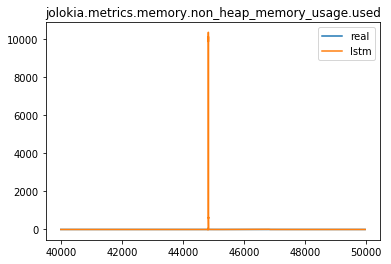

Mean Squared Error :  57735.99987923067


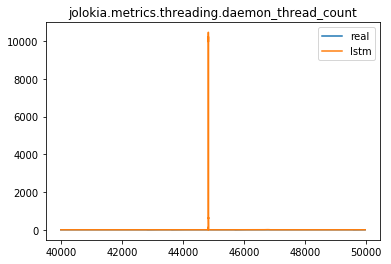

Mean Squared Error :  58872.59076938658


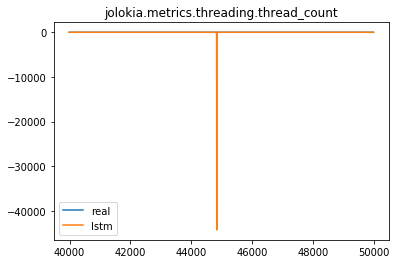

Mean Squared Error :  992756.0133845126


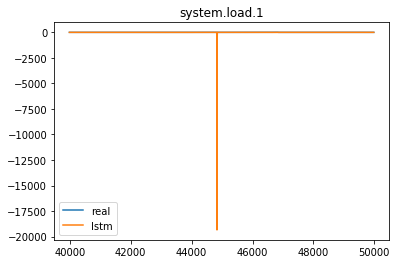

Mean Squared Error :  189635.84846870106


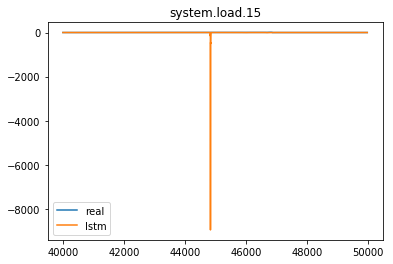

Mean Squared Error :  37584.47633310721


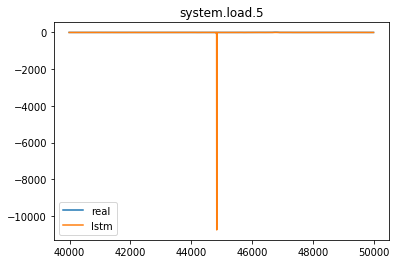

Mean Squared Error :  55242.8414247922


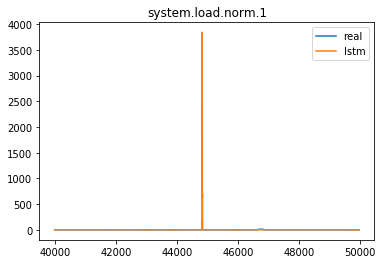

Mean Squared Error :  3416.138015491929


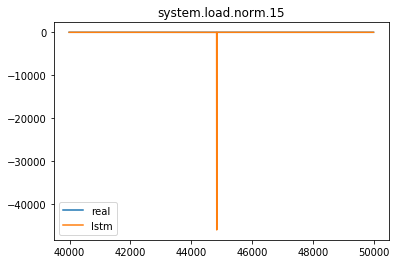

Mean Squared Error :  1044626.0710475494


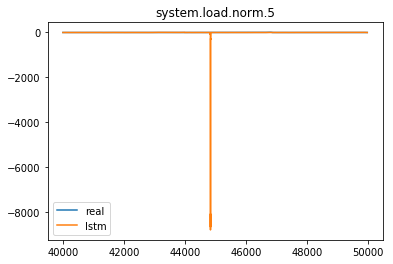

Mean Squared Error :  42629.433699377994


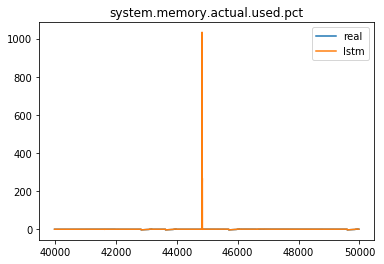

Mean Squared Error :  297.7333090569899


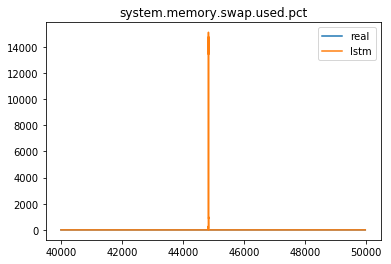

Mean Squared Error :  127945.75011267138


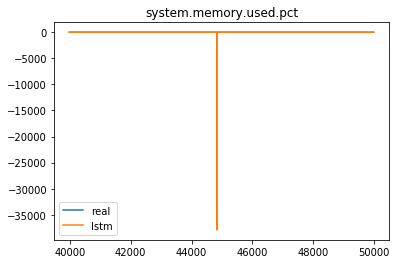

Mean Squared Error :  708988.177004884


In [114]:
f = pyplot.figure()
for i in range(test_dataset_shifted.shape[1]):
    pyplot.plot(test_dataset_shifted[test_dataset_shifted.columns[i]], label='real')
    pyplot.plot(test_dataset_predicted_pd[test_dataset_predicted_pd.columns[i]], label='GRU')
    pyplot.legend()
    pyplot.title(test_dataset_shifted.columns[i])
    pyplot.show()
    print("Mean Squared Error : ",mean_squared_error(test_dataset_shifted[test_dataset_shifted.columns[i]], test_dataset_predicted_pd[test_dataset_predicted_pd.columns[i]]))

## Saving Prediction

In [118]:
test_dataset_predicted_pd.to_csv("predicted_data_multi_model.csv")

In [119]:
test_dataset.to_csv("test_data_multi_.csv")

In [120]:
test_dataset_shifted.to_csv("test_dataset_shifted_multi_model.csv")